In [1]:
# Supervised ML Project


In [2]:
#import the basic module
import pandas as pd
import numpy as nb
import seaborn as sb
import matplotlib.pyplot as plt
import warnings as w
w.filterwarnings('ignore')

In [3]:
# loading dataset of kaggle_diabetes.csv file by using read_csv() inbuilt function of pandas library
#and  creating a df object
df=pd.read_csv('kaggle_diabetes.csv')

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [5]:
#checking the sumarry of dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [6]:
#checking null values 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

observation:
    There is no null values in dataset.

In [7]:
#cross check null values with checking the datatype of dataframe
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<AxesSubplot:>

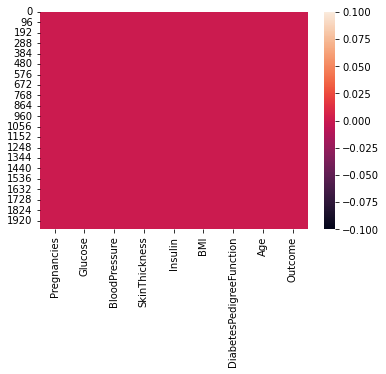

In [8]:
#checking null values in visualization form.
sb.heatmap(df.isnull())

In [9]:
#checking dublicate values.
df.duplicated().sum()

1256

observation:
    there is 1256 duplicates are present in dataset.

In [10]:
#if i want to see duplicat row.
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
483,0,84,82,31,125,38.2,0.233,23,0
484,0,145,0,0,0,44.2,0.630,31,1
485,0,135,68,42,250,42.3,0.365,24,1
486,1,139,62,41,480,40.7,0.536,21,0
487,0,173,78,32,265,46.5,1.159,58,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [11]:
# remove duplicates values premanent
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
#now checking the frequency of binary classifier of outcome column
df['Outcome'].value_counts()

0    491
1    253
Name: Outcome, dtype: int64

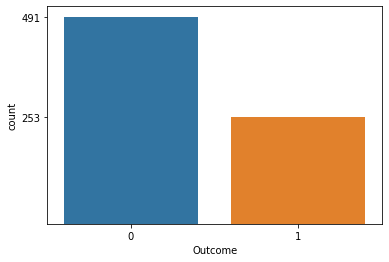

In [14]:
#if i want to visualize the binary classifier are balance or unbalanced
sb.countplot(data=df,x='Outcome')
f=df['Outcome'].value_counts()
plt.yticks(f)
plt.show()

observation:
    its a balance scale.

In [15]:
#select the input and output
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [16]:
#preparing the model by dividing data into 70:30 ratio
#by using train_test_split of sklearn library
from sklearn.model_selection import train_test_split
#creating an object
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [17]:
#create a function 
def create_model (model):   #model is parameter which gonna hold the object of algo
    #train the model
    model.fit(x_train,y_train)
    #test the model
    y_predict=model.predict(x_test)
    #generating the report
    from sklearn.metrics import classification_report
    print(classification_report(y_test,y_predict))
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(y_test,y_predict))
    return model

In [18]:
#now before giving the data to the machine we have to do scaling
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [19]:
#training the model by using logistic regression class of sklearn library
from sklearn.linear_model import LogisticRegression
#creating an object of LogisticRegression class
lr=LogisticRegression()


In [20]:
#generate then classification report
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       154
           1       0.68      0.60      0.64        70

    accuracy                           0.79       224
   macro avg       0.75      0.74      0.74       224
weighted avg       0.78      0.79      0.78       224

[[134  20]
 [ 28  42]]


In [21]:
#the accuracy is not good.


# Decision Tree

In [22]:
#now we use decision tree for selecting the important feature.
#beacuse logistic regression doesn't select the feature.
#decision tree also inreace the accuacry score.
#import Decision tree class
from sklearn.tree import DecisionTreeClassifier
#create the object the Decisiontreeclassifier
dt=DecisionTreeClassifier()
#call dtc funcation
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.74      0.66      0.69       154
           1       0.39      0.49      0.43        70

    accuracy                           0.60       224
   macro avg       0.56      0.57      0.56       224
weighted avg       0.63      0.60      0.61       224

[[101  53]
 [ 36  34]]


In [23]:
#if i want to check the information gain value return to DecisionTreeClassifier class object
dt.feature_importances_

array([0.06030807, 0.31472673, 0.09728981, 0.05876096, 0.03431427,
       0.15195854, 0.1573555 , 0.12528612])

In [24]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [25]:
#if i want to compare the ig value coming out or which feature 
#for that creating a df object
dict={'input':x.columns,'ig':dt.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('ig',axis=0,ascending=False,ignore_index=True)

,input,ig
0,Glucose,0.314727
1,DiabetesPedigreeFunction,0.157355
2,BMI,0.151959
3,Age,0.125286
4,BloodPressure,0.097290
5,Pregnancies,0.060308
6,SkinThickness,0.058761
7,Insulin,0.034314


In [26]:
df1

,input,ig
0,Pregnancies,0.060308
1,Glucose,0.314727
2,BloodPressure,0.097290
3,SkinThickness,0.058761
4,Insulin,0.034314
5,BMI,0.151959
6,DiabetesPedigreeFunction,0.157355
7,Age,0.125286


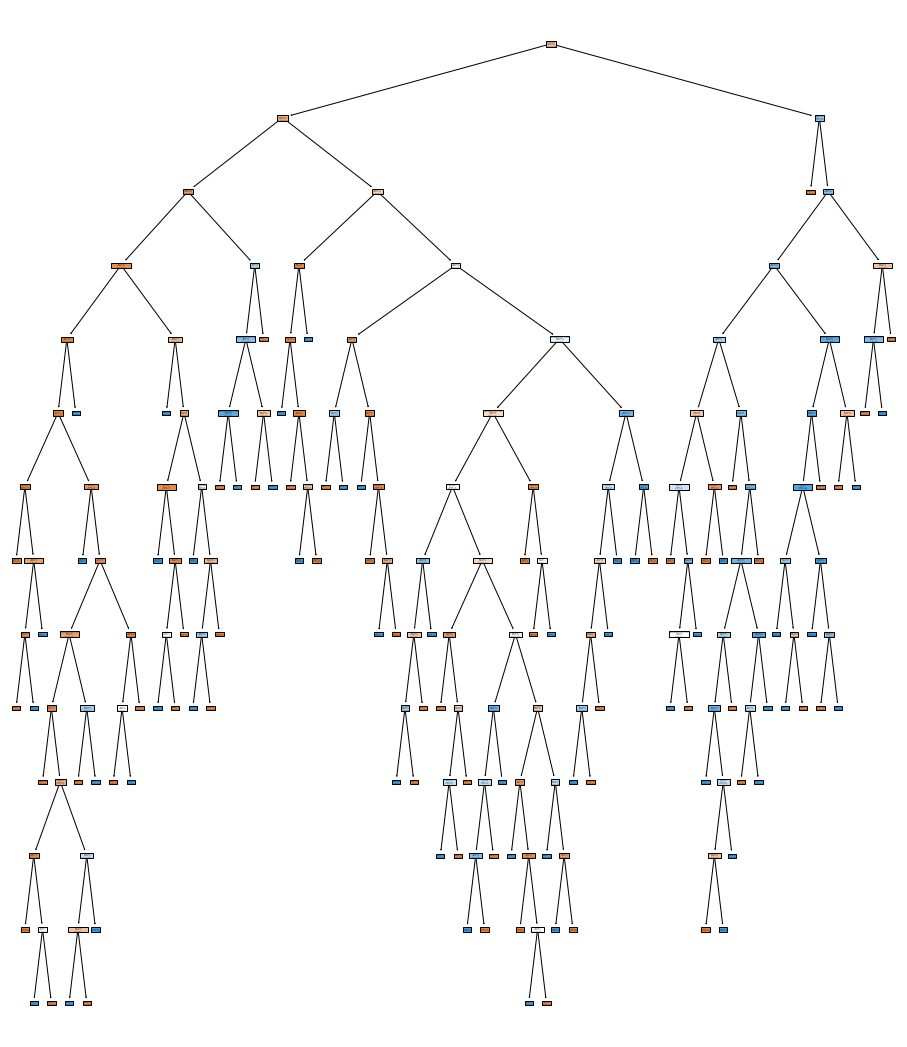

In [27]:
#create a tree
from sklearn import tree
plt.figure(figsize=(16,19))
features=x.columns
_=tree.plot_tree(dt,feature_names=features,filled=True)

# pruning technique

In [28]:

#we use puruning tech for reduced the overfiting.
dt1=DecisionTreeClassifier(max_depth=4,random_state=1)

In [29]:
#generate the classification report
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.88      0.68      0.76       154
           1       0.53      0.80      0.64        70

    accuracy                           0.71       224
   macro avg       0.70      0.74      0.70       224
weighted avg       0.77      0.71      0.72       224

[[104  50]
 [ 14  56]]


# observation:
    in decision tree pruning technique the recall accuracy is 
    0:68    
    1:80
 the accuracy is good.       

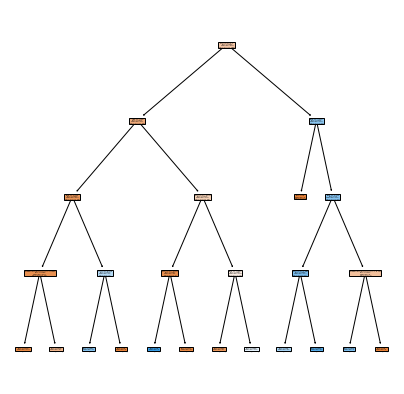

In [30]:
#create the tree
from sklearn import tree
plt.figure(figsize=(7,7))
features=x.columns
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [31]:
#if i want to check the information gain value return to DecisionTreeClassifier class object
dt1.feature_importances_

array([0.        , 0.56559613, 0.        , 0.        , 0.01980196,
       0.20982281, 0.06448554, 0.14029356])

In [32]:
#if i want to compare the ig value coming out or which feature 
#it achieve by creating a df2 object
dict1={'input':x.columns,'ig':dt1.feature_importances_}
df2=pd.DataFrame(dict1)
df2
df2.sort_values('ig',axis=0,ascending=False,ignore_index=True)

,input,ig
0,Glucose,0.565596
1,BMI,0.209823
2,Age,0.140294
3,DiabetesPedigreeFunction,0.064486
4,Insulin,0.019802
5,Pregnancies,0.000000
6,BloodPressure,0.000000
7,SkinThickness,0.000000


In [33]:
#so its hit and trial method
#finding out what no of depth we r getting recall accuracy better compare to others
'''for i in range(45,101):
    #preparing the model by calling the class
    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    print('no of min sample leaf: ',i)
    #now training the model and testing the model and getting classification rport of model
    #by calling the function passing the argument as DecisionTreeClassifier object
    dt2=create_model(dt2)
    dt2
    print()'''
   #here in min_sample_leaf=46 there 0 : 78 and 1: 69 its good accuarcy.

"for i in range(45,101):\n    #preparing the model by calling the class\n    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)\n    print('no of min sample leaf: ',i)\n    #now training the model and testing the model and getting classification rport of model\n    #by calling the function passing the argument as DecisionTreeClassifier object\n    dt2=create_model(dt2)\n    dt2\n    print()"

In [34]:
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=46)
#generate the classification report
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       154
           1       0.59      0.69      0.63        70

    accuracy                           0.75       224
   macro avg       0.72      0.73      0.72       224
weighted avg       0.76      0.75      0.75       224

[[120  34]
 [ 22  48]]


In [35]:
dict3={'input':x.columns,'ig':dt2.feature_importances_}
df3=pd.DataFrame(dict3)
df3.sort_values('ig',axis=0,ascending=False,ignore_index=True)

,input,ig
0,Glucose,0.678041
1,Age,0.176418
2,BMI,0.133825
3,DiabetesPedigreeFunction,0.011716
4,Pregnancies,0.000000
5,BloodPressure,0.000000
6,SkinThickness,0.000000
7,Insulin,0.000000


# entropy method.

In [36]:
# again doing feature selection by dtclassiiferalgo by using entropy method
#create the object of DecisionTreeClassifier
dte=DecisionTreeClassifier(random_state=1,criterion='entropy')
#generate the report
dte=create_model(dte)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       154
           1       0.58      0.54      0.56        70

    accuracy                           0.74       224
   macro avg       0.69      0.68      0.69       224
weighted avg       0.73      0.74      0.73       224

[[127  27]
 [ 32  38]]


In [37]:
#we do pruning tech with help of entropy.
#so its hit and trial method
#finding out what no of depth we r getting recall accuracy better compare to others
'''
for i in range(8,0,-1):
    #preparing the model
    dte=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=i)
    print('max depth :',i)
    #calling function
    dte=create_model(dte)
    dte
    print()'''
    #here max_depth=7 0:73 ,1:66

"\nfor i in range(8,0,-1):\n    #preparing the model\n    dte=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=i)\n    print('max depth :',i)\n    #calling function\n    dte=create_model(dte)\n    dte\n    print()"

In [38]:
dte1=DecisionTreeClassifier(random_state=1,max_depth=4,criterion='entropy')
#generate the report.
dte1=create_model(dte1)

              precision    recall  f1-score   support

           0       0.88      0.69      0.78       154
           1       0.54      0.79      0.64        70

    accuracy                           0.72       224
   macro avg       0.71      0.74      0.71       224
weighted avg       0.77      0.72      0.73       224

[[107  47]
 [ 15  55]]


In [39]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [40]:
#import feature in dte1.
dte1.feature_importances_

array([0.02428828, 0.51525095, 0.        , 0.03100574, 0.04424151,
       0.26131594, 0.03164161, 0.09225598])

In [41]:
#if i want to compare the ig value coming out or which feature 
#it achieve by creating a dfe object
dicte={'input':x.columns,'ig':dte1.feature_importances_}
dfe=pd.DataFrame(dicte)
dfe.sort_values('ig',axis=0,ascending=False,ignore_index=True)

,input,ig
0,Glucose,0.515251
1,BMI,0.261316
2,Age,0.092256
3,Insulin,0.044242
4,DiabetesPedigreeFunction,0.031642
5,SkinThickness,0.031006
6,Pregnancies,0.024288
7,BloodPressure,0.000000


In [42]:
#we r finding out at what no of mn samples leaf we r getting recall accuracy good compare to others
'''
for i in range(45,101,1):
    #preparing the model
    dtee=DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=i)
    print('min_samples_leaf :',i)
    #calling function
    dtee=create_model(dtee)
    dtee
    print()
    '''
#here min_samples_leaf=46 1:69 and 0:79

"\nfor i in range(45,101,1):\n    #preparing the model\n    dtee=DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=i)\n    print('min_samples_leaf :',i)\n    #calling function\n    dtee=create_model(dtee)\n    dtee\n    print()\n    "

In [43]:
#preparing the model
#calling the class
dte2=DecisionTreeClassifier(random_state=1,min_samples_leaf=61,criterion='entropy')
#calling function
dte2=create_model(dte2)
dte2

              precision    recall  f1-score   support

           0       0.89      0.69      0.78       154
           1       0.55      0.81      0.66        70

    accuracy                           0.73       224
   macro avg       0.72      0.75      0.72       224
weighted avg       0.78      0.73      0.74       224

[[107  47]
 [ 13  57]]


DecisionTreeClassifier(criterion='entropy', min_samples_leaf=61, random_state=1)

In [44]:
#if i want to compare the ig value coming out or which feature 
# creating a dfe 1object
dicte1={'input':x.columns,'ig':dte2.feature_importances_}
dfe1=pd.DataFrame(dicte1)
dfe1.sort_values('ig',axis=0,ascending=False,ignore_index=True)

,input,ig
0,Glucose,0.623470
1,BMI,0.256600
2,Age,0.119931
3,Pregnancies,0.000000
4,BloodPressure,0.000000
5,SkinThickness,0.000000
6,Insulin,0.000000
7,DiabetesPedigreeFunction,0.000000


# esemble : 1.RandomForestClassifier

In [45]:
#call the randomforestclassifier class in sklearn library.
from sklearn.ensemble import RandomForestClassifier

In [46]:
#using hit and trial method to find the max_features 
'''
for i in range(9,0,-1):
    #creating an object
    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1)
    #by default gini index.
    print('no of features:',i)
    #calling a function
    rfc=create_model(rfc)
    rfc
    print()
    '''
in the above result there 

SyntaxError: invalid syntax (2770916956.py, line 13)

In [ ]:
#create the object of class of RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,max_features=2,random_state=1)
#n_estimators means take how many  no .of decisiontree.
#max_features means take how many input.

In [ ]:
rfc=create_model(rfc)

# now apply RandomForestClassifier using entropy algo.

In [ ]:
#using hit and trial method to find at minimum number of features
'''
for i in range(13,0,-1):
    #creating an object
    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1,criterion='entropy')
    #by default gini index.
    print('no of features:',i)
    #calling a function
    rfc=create_model(rfc)
    rfc
    print()
    '''

In [ ]:
rfc=RandomForestClassifier(n_estimators=10,max_features=7,random_state=1,criterion='entropy')

In [ ]:
#generate the report
rfc=create_model(rfc)

# 2.ADaboost Classifier

In [ ]:
#call the class of AdaBoostclassifier 
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
#create the object of AdaBoostClassfier
abc=AdaBoostClassifier()

In [ ]:
#using hit and trial method to find at n_estimators 

for i in range(1,10,1):
    #preparing the model
    abc=AdaBoostClassifier(n_estimators=i,random_state=1)
    print('no of decision stump',i)
    #now trainging and testing and finding classification report by calling function
    abc=create_model(abc)
    abc
    print()
 #n_estimators means how many decision stump
#n_estimators<=100.
#in decision stump 13 we get good recall accuacy.

In [ ]:
abc=AdaBoostClassifier(n_estimators=5,random_state=1)

In [ ]:
#generate the classification report
abc=create_model(abc)

# 3.GradientBoostingClassifier

In [ ]:
#call the GradientBoostingClassifier class in sklearn.ensemble library
from sklearn.ensemble import GradientBoostingClassifier
#create the object of GradientBoostingClassifierb
gb=GradientBoostingClassifier(n_estimators=23,random_state=1)
gb=create_model(gb)


In [ ]:
'''
for i in range(10,101):
    #prpearing the model
    #creating an object of GradientBoostingClassifier class
    gb=GradientBoostingClassifier(n_estimators=i,random_state=1)
    print('no of estimator of DT: ',i)
    # #now trainging and testing and finding classification report by calling function
    gb=create_model(gb)
    gb
    '''
#the n_estimator =56 is 0:83 and 1:63

# 4.Extremegradientboosting

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
'''
for i in range(10,101,1):
    #prparing the model
    #creating the object of XGBClassifier class
    #automatic overfitting: reg means regularization and alpha or lambda:
    #hyperparameter
    xgc=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)
    print('no of estimator',i)
    #calling functon
    xgc=create_model(xgc)
    xgc
    print()
    '''

In [ ]:
xgc=XGBClassifier(n_estimators=10,reg_alpha=1,random_state=1)
#reg means regulization alpha means lambda :automatic overfiting
#n_estimators 

In [ ]:
#generate the report
xgc=create_model(xgc)

In [ ]:
#CALL INBULIT CLASS.
#LINER separabledta means linear kernal.
from sklearn.svm import LinearSVC
#linersvc means linear supoort vector classifier.

In [ ]:
#create a object for #create a object for  class
svc=LinearSVC(random_state=1)#bydefalut hardmargin  ,supoose no outlier in my dataset.

In [ ]:
#getting report of model
svc=create_model(svc)
print(svc)

In [ ]:
svc1=LinearSVC(random_state=1,C=0.01)
svc1=create_model(svc1)

In [ ]:
observation:
    in supoort vector classifier after adding the error the recall accuracy of 0:86 & 1:60 
    the accuracy is not good .and after error increaing the recall accuracy is changing so it is linear seperatable data.

# KNN algo

In [ ]:
#call the call of kneighborsClassifier.
from sklearn.neighbors import KNeighborsClassifier
#create the object of KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors =5,metric='minkowski',p=2)
#bydefault the n_neighbors is 5 (alway odd )
#p=2 means eucliden metric.
#genrate the report
knc=create_model(knc)